In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Conditional Statements

In [2]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    if x == 0:
        print('zero')

sign(3)
sign(-3)
sign(0)

3 is positive
-3 is negative
0 is zero


In [6]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    elif x < 0:
        print('negative')
    else:
        print('zero')

sign(3)
# sign(-3)
# sign(0)

3 is positive


## For Statements

In [8]:
np.append(make_array(1, 2, 3), 4)

array([1, 2, 3, 4])

In [9]:
np.append(make_array(1, 2, 3), make_array(4, 5, 6))

array([1, 2, 3, 4, 5, 6])

In [10]:
np.arange(4)

array([0, 1, 2, 3])

In [11]:
for i in np.arange(4):
    print('Iteration:', i)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [12]:
i = 0
print('Iteration:', i)
i = 1
print('Iteration:', i)
i = 2
print('Iteration:', i)

Iteration: 0
Iteration: 1
Iteration: 2


In [13]:
coin = make_array('heads', 'tails')
coin

array(['heads', 'tails'], 
      dtype='<U5')

In [16]:
np.random.choice(coin, 5)

array(['tails', 'heads', 'tails', 'heads', 'heads'], 
      dtype='<U5')

In [26]:
np.count_nonzero(np.random.choice(coin, 100) == 'heads')

50

In [32]:
num_heads = make_array()
for i in np.arange(10000):
    num_heads = np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([ 47.,  51.,  46., ...,  51.,  53.,  51.])

In [33]:
len(num_heads)

10000

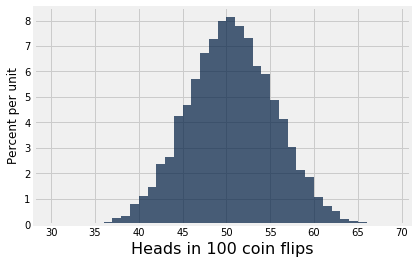

In [35]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

## Monty Hall

CG G

GC G

G G C

1. Put prizes behind doors randomly
2. I pick a door
3. Monty opens a door
4. Reveal what was behind each door

In [36]:
doors = make_array(1, 2, 3)
doors

array([1, 2, 3])

In [38]:
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], 
      dtype='<U11')

In [41]:
np.random.choice(prizes, 3, replace=False)

array(['first goat', 'car', 'second goat'], 
      dtype='<U11')

In [44]:
def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False)
    )

a_game = setup()
a_game

Door,Prize
1,second goat
2,car
3,first goat


**How would you define a function `behind` that takes in a game and a door number and returns the prize behind the door (eg. `'first goat'`)?**

```
behind(a_game, 1) => 'second goat'
behind(a_game, 2) => 'car'
behind(a_game, 3) => 'first goat'
```

In [45]:
def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)


for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the second goat
Behind door number 2 is the car
Behind door number 3 is the first goat


In [50]:
def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 2
The first goat is behind door number 3
The second goat is behind door number 1


In [55]:
a_game

Door,Prize
1,second goat
2,car
3,first goat


**How would you write a function `expose` that takes in a game and a guessed door number and shows which door Monty Hall would open to expose a goat?**

```
expose(a_game, 1) => 3
expose(a_game, 3) => 1
```

1. Find the prize behind door.
2. FIgure which other prize Monty will see.
3. Figure out the door that has the prize Monty will open.

In [61]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = 'first goat'
    return location(game, reveal)

a_guess = 3
an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 3 which hides the first goat
Monty Hall opens door 1 to expose the second goat


This is as far as we got on Wednesday's lecture!

In [ ]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return ...

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

**Let's simulate one game of the Monty Hall Problem. Create a list where the first element is the prize behind the first guess, the second is the prize behind Monty's exposed door, and the third is the prize behind the remaining door.**

In [ ]:
trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(10000)+1:
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])
    
trials